In [25]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from requests.exceptions import ChunkedEncodingError
import re
import os
from deep_translator import GoogleTranslator
import glob
import nltk
from nltk import FreqDist, word_tokenize
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
# Mirar en que directorio estamos
print(os.getcwd())

# Si no estamos en csv-export entrar al directorio
if os.getcwd() != r'C:\Users\erodr\Documents\GithubProjects\MyPythonScripts\AI\IdeasAI\csv-export':
    os.chdir(r'C:\Users\erodr\Documents\GithubProjects\MyPythonScripts\AI\IdeasAI\csv-export')
    print('Changed directory to csv-export')
else:
    print('Already in csv-export directory')

# if exist remove combined_csv.csv and combined_csv_modified.csv and combined_csv_modified_final.csv
if os.path.exists('combined_csv.csv'):
    os.remove('combined_csv.csv')
    print('combined_csv.csv removed')
if os.path.exists('combined_csv_modified.csv'):
    os.remove('combined_csv_modified.csv')
    print('combined_csv.csv removed')
if os.path.exists('combined_csv_modified_final.csv'):
    os.remove('combined_csv_modified_final.csv')
    print('combined_csv.csv removed')
else:
    print('combined_csv.csv does not exist')

C:\Users\erodr\Documents\GithubProjects\MyPythonScripts\AI\IdeasAI\csv-export
Already in csv-export directory
combined_csv.csv does not exist


In [27]:
# Mirar en que directorio estamos
print(os.getcwd())

C:\Users\erodr\Documents\GithubProjects\MyPythonScripts\AI\IdeasAI\csv-export


In [28]:
# Junta todos los csv en uno solo
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')
print("CSVs combinados")

CSVs combinados


In [29]:
# Lee el csv
df = pd.read_csv("combined_csv.csv")
print(df.head())

                Tag                                               Idea  \
0  3d Startup Ideas  A tool for managing supply chains, designed to...   
1  3d Startup Ideas  An online marketplace for tutors for students ...   
2  3d Startup Ideas  A home energy management system that maintains...   
3  3d Startup Ideas  A company that will work with companies in the...   
4  3d Startup Ideas  A web-based system for managing and tracking t...   

                                      Palabras clave Palabra clave 1  \
0  ['tool', 'managing', 'supply', 'chains', 'desi...             NaN   
1  ['online', 'marketplace', 'tutors', 'students'...             NaN   
2  ['energy', 'home', 'management', 'system', 'ma...             NaN   
3  ['customers', 'company', 'work', 'companies', ...             NaN   
4  ['system', 'managing', 'tracking', 'expenses',...             NaN   

  Palabra clave 2 Palabra clave 3 Palabra clave 4 Palabra clave 5  
0             NaN             NaN             NaN     

C:\Users\erodr\AppData\Local\Temp\ipykernel_11848\1851424356.py:2: DtypeWarning: Columns (3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("combined_csv.csv")


In [30]:
# Calcular cuantas palabras hay en total
total_words = 0
for index, row in combined_csv.iterrows():
    total_words += len(row['Palabras clave'].split())

print('Total words: ', total_words)

Total words:  4786462


In [31]:
print(os.getcwd())

C:\Users\erodr\Documents\GithubProjects\MyPythonScripts\AI\IdeasAI\csv-export


In [32]:
# Abrir archivo
df = pd.read_csv('combined_csv.csv')

# Quitar [ y ] de la columna de los palabra clave
df['Palabras clave'] = df['Palabras clave'].str.replace('[', '')
df['Palabras clave'] = df['Palabras clave'].str.replace(']', '')

# Quitar "'" de la columna de los palabra clave
df['Palabras clave'] = df['Palabras clave'].str.replace("'", '')

# Separar las palabras clave por comas en varias columnas
df[['Palabra clave 1', 'Palabra clave 2', 'Palabra clave 3', 'Palabra clave 4', 'Palabra clave 5']] = df['Palabras clave'].str.split(',', expand=True)

# Eliminar la columna de las palabras clave
df.drop('Palabras clave', axis=1, inplace=True)

print("Total de palabras clave: ", len(df['Palabra clave 1']) + len(df['Palabra clave 2']) + len(df['Palabra clave 3']) + len(df['Palabra clave 4']) + len(df['Palabra clave 5']))

# Sobre escribir el archivo
df.to_csv('combined_csv_modified.csv', index=False)


print('Archivo CSV creado')

C:\Users\erodr\AppData\Local\Temp\ipykernel_11848\1921510070.py:2: DtypeWarning: Columns (3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('combined_csv.csv')
C:\Users\erodr\AppData\Local\Temp\ipykernel_11848\1921510070.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Palabras clave'] = df['Palabras clave'].str.replace('[', '')
C:\Users\erodr\AppData\Local\Temp\ipykernel_11848\1921510070.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Palabras clave'] = df['Palabras clave'].str.replace(']', '')


Total de palabras clave:  3454070
Archivo CSV creado


In [33]:
# Abrir archivo
df = pd.read_csv('combined_csv_modified.csv')

df.head()

,Tag,Idea,Palabra clave 1,Palabra clave 2,Palabra clave 3,Palabra clave 4,Palabra clave 5
0,3d Startup Ideas,"A tool for managing supply chains, designed to...",tool,managing,supply,chains,designed
1,3d Startup Ideas,An online marketplace for tutors for students ...,online,marketplace,tutors,students,subjects
2,3d Startup Ideas,A home energy management system that maintains...,energy,home,management,system,maintains
3,3d Startup Ideas,A company that will work with companies in the...,customers,company,work,companies,travel
4,3d Startup Ideas,A web-based system for managing and tracking t...,system,managing,tracking,expenses,whole


In [34]:
# Abrir archivo
df = pd.read_csv('combined_csv_modified.csv')

# Combinar todas las columnas en una sola lista y eliminar duplicados para cada fila
df['Palabras clave'] = df.apply(lambda row: list(set(row[['Palabra clave 1', 'Palabra clave 2', 'Palabra clave 3', 'Palabra clave 4', 'Palabra clave 5']].dropna())), axis=1)

# Mostrar el total de filas en el DataFrame
print('Total rows: ', df.shape[0])

# Guardar en un archivo
df.to_csv('combined_csv_final.csv', index=False)

print('Archivo CSV creado')


Total rows:  690814
Archivo CSV creado


In [35]:
# Abrir archivo
df = pd.read_csv('combined_csv_final.csv')

# Quitar [ y ] de la columna de los palabra clave
df['Palabras clave'] = df['Palabras clave'].str.replace('[', '')
df['Palabras clave'] = df['Palabras clave'].str.replace(']', '')

# Quitar "'" de la columna de los palabra clave
df['Palabras clave'] = df['Palabras clave'].str.replace("'", '')

# Separar las palabras clave por comas en varias columnas
df[['Palabra clave 1', 'Palabra clave 2', 'Palabra clave 3', 'Palabra clave 4', 'Palabra clave 5']] = df['Palabras clave'].str.split(',', expand=True)

# Eliminar la columna de las palabras clave
df.drop('Palabras clave', axis=1, inplace=True)

# Sobre escribir el archivo
df.to_csv('combined_csv.csv', index=False)

print('Archivo CSV creado')


C:\Users\erodr\AppData\Local\Temp\ipykernel_11848\1496228262.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Palabras clave'] = df['Palabras clave'].str.replace('[', '')
C:\Users\erodr\AppData\Local\Temp\ipykernel_11848\1496228262.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Palabras clave'] = df['Palabras clave'].str.replace(']', '')


Archivo CSV creado


In [36]:
# Abrir archivo
df = pd.read_csv('combined_csv_final.csv')

# Combine all the columns into a single list
keywords = df[['Palabra clave 1', 'Palabra clave 2', 'Palabra clave 3', 'Palabra clave 4', 'Palabra clave 5']].values.flatten().tolist()

# Remove the None values from the list
keywords = [word for word in keywords if str(word) != 'nan']

# Ver csv
df.head()



,Tag,Idea,Palabra clave 1,Palabra clave 2,Palabra clave 3,Palabra clave 4,Palabra clave 5,Palabras clave
0,3d Startup Ideas,"A tool for managing supply chains, designed to...",tool,managing,supply,chains,designed,"[' designed', ' managing', ' chains', 'tool', ..."
1,3d Startup Ideas,An online marketplace for tutors for students ...,online,marketplace,tutors,students,subjects,"[' tutors', ' marketplace', 'online', ' subjec..."
2,3d Startup Ideas,A home energy management system that maintains...,energy,home,management,system,maintains,"[' system', 'energy', ' home', ' management', ..."
3,3d Startup Ideas,A company that will work with companies in the...,customers,company,work,companies,travel,"[' company', ' work', ' companies', ' travel',..."
4,3d Startup Ideas,A web-based system for managing and tracking t...,system,managing,tracking,expenses,whole,"[' managing', 'system', ' tracking', ' whole',..."


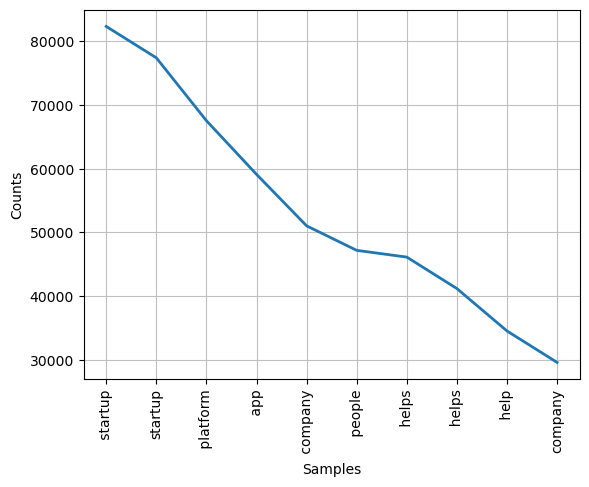

<Axes: xlabel='Samples', ylabel='Counts'>

In [37]:
# Get the frequency distribution of the keywords are in column 'palabras clave'
fdist = FreqDist(keywords)

# Get the 10 most used keywords
most_used_keywords = fdist.most_common(10)

# Get the 10 least used keywords
least_used_keywords = fdist.most_common()[-10:]

# Plot the least used keywords
fdist.plot(10, cumulative=False)


In [38]:
def search_keywords(keywords):
    # Abrir archivo
    df = pd.read_csv('combined_csv_final.csv')

    # Combine all the columns into a single list
    all_keywords = df[['Palabra clave 1', 'Palabra clave 2', 'Palabra clave 3', 'Palabra clave 4', 'Palabra clave 5']].values.flatten().tolist()

    # Remove the None values from the list
    all_keywords = [word for word in all_keywords if str(word) != 'nan']

    # Get the frequency distribution of the keywords
    fdist = FreqDist(all_keywords)

    # Get the rows that contain any of the keywords in any of the keyword columns
    rows = df[df[['Palabra clave 1', 'Palabra clave 2', 'Palabra clave 3', 'Palabra clave 4', 'Palabra clave 5']].apply(lambda row: any(keyword in row.values for keyword in keywords), axis=1)]

    return rows

# Search for the keywords
rows = search_keywords(['startup'])

# Print total rows of the DataFrame
print('Total rows: ', df.shape[0])

# Print how many rows contain the keywords
print('Rows containing the keywords: ', rows.shape[0])

Total rows:  690814
Rows containing the keywords:  77375


    Palabra clave  Frecuencia
0         startup       77375
1           helps       16451
2          people        5508
3            keep        1645
4           track        1653
..            ...         ...
531         built           1
532       branded           1
533     financial           1
534       advisor           1
535            uk           1

[536 rows x 2 columns]


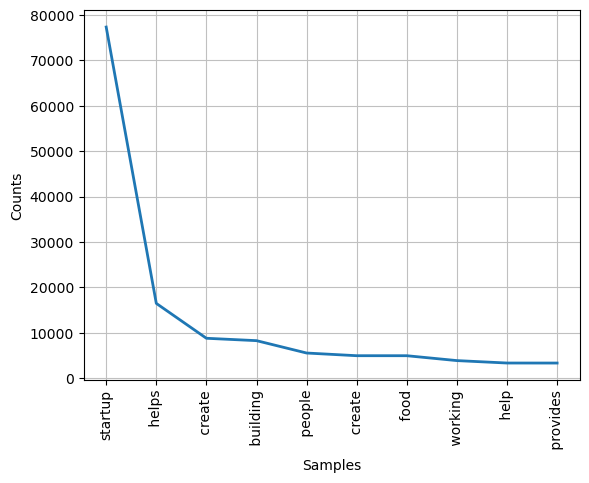

<Axes: xlabel='Samples', ylabel='Counts'>

In [39]:
# Get the frequency distribution of the keywords you searched for
fdist = FreqDist(rows[['Palabra clave 1', 'Palabra clave 2', 'Palabra clave 3', 'Palabra clave 4', 'Palabra clave 5']].values.flatten().tolist())

# Convertir la distribución de frecuencia a un DataFrame
df_fdist = pd.DataFrame.from_dict(fdist, orient='index', columns=['Frecuencia']).reset_index()
df_fdist.columns = ['Palabra clave', 'Frecuencia']

#Imprimir el DataFrame
print(df_fdist)

# Plot the frequency distribution
fdist.plot(10, cumulative=False)
